Mean Squared Error: 22.195449661485775


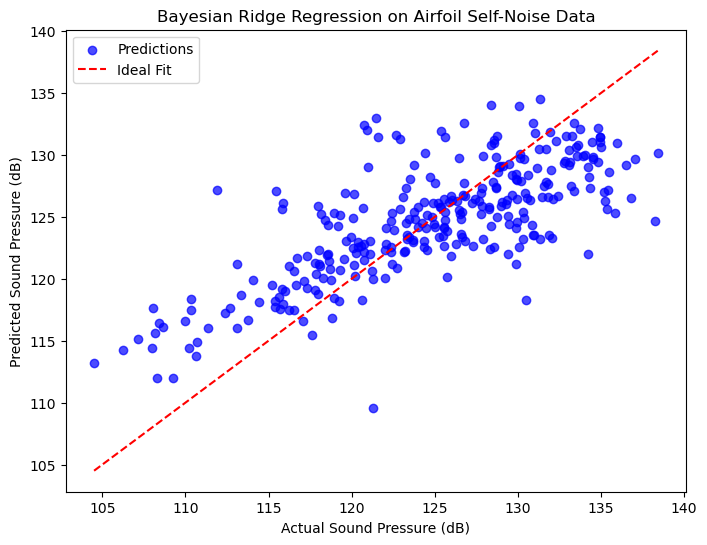

In [3]:
# Step 1: Import libraries and load the Airfoil Self-Noise dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset from OpenML (Airfoil Self-Noise, data_id=41164)
airfoil = fetch_openml(data_id=44957, as_frame=True)
df = airfoil.frame

# The dataset columns:
#   - frequency: in Hertz
#   - angle_of_attack: in degrees
#   - chord_length: in meters
#   - free_stream_velocity: in m/s
#   - displacement_thickness: in meters
#   - sound_pressure: in decibels (target feature)
feature_names = ['frequency', 'angle_of_attack', 'chord_length', 'free_stream_velocity', 'displacement_thickness']
target_name = 'sound_pressure'

X = df[feature_names].values
y = df[target_name].values

# Step 2: Split the data and train the Bayesian Ridge Regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)

# Step 3: Evaluate the model and visualize predictions
y_pred = bayesian_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualization: Plot Actual vs. Predicted Sound Pressure
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal Fit')
plt.xlabel('Actual Sound Pressure (dB)')
plt.ylabel('Predicted Sound Pressure (dB)')
plt.title('Bayesian Ridge Regression on Airfoil Self-Noise Data')
plt.legend()
plt.show()
